# Supervised Learning with scikit-learn

**Machine learning** is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this notebook, you'll learn how to use Python to perform **supervised learning**, an essential component of **machine learning**. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using **scikit-learn**, one of the most popular and user-friendly machine learning libraries for Python.

## Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to **classification** or **regression**. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

- Using labeled financial data to predict whether the value of a stock will go up or go down next week. (correct)
- Using labeled housing price data to predict the price of a new house based on various features.
- Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
- Using labeled financial data to predict what the value of a stock will be next week.

In this example, there are two discrete, qualitative outcomes: the stock market going up, and the stock market going down. This can be represented using a binary variable, and is an application perfectly suited for classification.

## Numerical EDA

In this chapter, you'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform **Exploratory data analysis (EDA)** in order to understand the structure of the data.

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called `df`. Use pandas' `.head()`, `.info()`, and `.describe()` methods in the IPython Shell to explore the DataFrame, and select the statement below that is not true.

- The DataFrame has a total of 435 rows and 17 columns.
- Except for 'party', all of the columns are of type int64.
- The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
- There are 17 predictor variables, or features, in this DataFrame. (not true)
- The target variable in this DataFrame is 'party'.

The number of columns in the DataFrame is not equal to the number of features. One of the columns - 'party' is the target variable.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = 'data/dc18/'

In [5]:
df = pd.read_csv(path+'congres.csv', index_col=0)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 61.2+ KB


In [7]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visual EDA

The **numerical EDA** you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some **visual EDA** will give you an even better understanding of the data. You may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a type of plot such as [Seaborn's countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html) would be useful here.

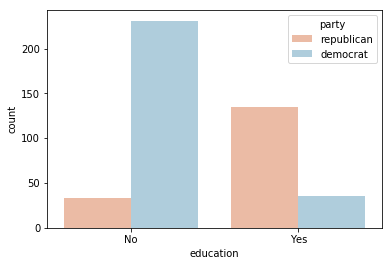

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In `sns.countplot()`, we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our **target variable**. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

Explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with `plt.figure()` so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

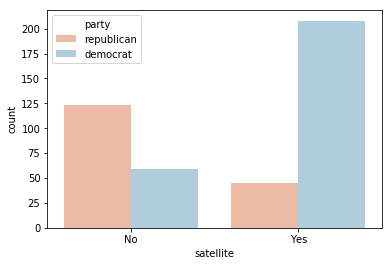

In [11]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

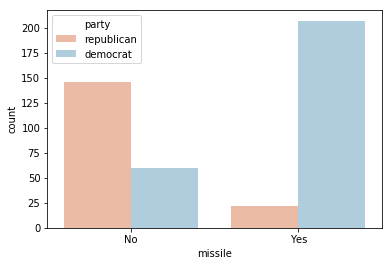

In [12]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats voted in favor of both 'satellite' and 'missile'.

## k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build your first **classifier**. In this exercise, you will fit a `k-Nearest Neighbors` classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame `df`.

For **scikit-learn** API, the features need to be in an array where each column is a **feature** and each row a different observation or data point - in this case, a Congressman's voting record. The **target** needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the `n_neighbors` parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called `df`.

In [13]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Now that your k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

## k-Nearest Neighbors: Predict

Having `fit` a k-NN classifier, you can now use it to `predict` the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the `.predict()` method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

Will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as `X_new`. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using `.predict()` on `X_new` will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as `df`. This time, you will create the feature array `X` and target variable array `y` yourself.

In [14]:
X_new = pd.read_csv(path+'X_new.csv', index_col=0)
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


In [15]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df["party"].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance?

## The digits recognition dataset

Up until now, you have been performing **binary classification**, since the target variable had two possible outcomes. In **multi-class classification** the target variable could take on three or more possible outcomes. In the following exercises, you'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in `digits.images`, or the [] notation, as in `digits['images']`.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

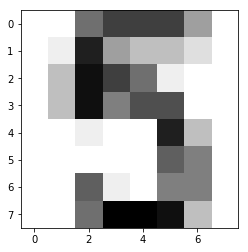

In [16]:
# Import necessary modules
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.data.shape)
print(digits.images.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? You'll do so in the next exercise!

## Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [17]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


## Overfitting and underfitting

In this exercise, you will compute and plot the training and testing accuracy scores (**model complexity curve**) for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for **overfitting** and **underfitting**.

The training and testing sets are available to you in the workspace as `X_train`, `X_test`, `y_train`, `y_test`. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

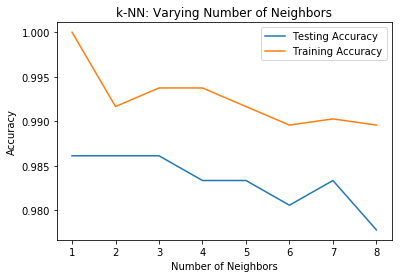

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.